# Cryptocurreny Exploratory Data Analysis
In this notebook we will be **using an API to retrieve cryptocurrency data** and store it in a dataframe for exploratory data analysis.

The **CoinGecko API** allows us to retrieve cryptocurrency data such as price, volume, market cap and exchange data from CoinGecko which is a data provider and crypto tracking website for coin info and more. We will need Internet connection to extract the data from the API.

We will be using it to extract data about price history of any specific coin. We also will extract the data about top 100 coins based on market cap and analyse it.

In [1]:
# !pip install pycoingecko

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from pycoingecko import CoinGeckoAPI
cg= CoinGeckoAPI()

# help(cg)

#### We are defining a function `price_history ` which can use to retrieve the price history of any crypto-coin using the CoinGecko API.

In [2]:
def price_history(ids,d):
    p_data= cg.get_coin_market_chart_by_id(id=ids, vs_currency='usd', days=d)['prices']
    data=pd.DataFrame(p_data, columns=['TimeStamp', 'Price'])
    data['TimeStamp']=pd.to_datetime(data['TimeStamp'], unit='ms')
    return data    

Using our predefined function we can easily retrieve price history of say 'bitcoin' in last 5 days

In [10]:
price_history('bitcoin',5)

,TimeStamp,Price
0,2022-02-04 19:02:23.974,40495.248570
1,2022-02-04 20:02:06.602,40781.156174
2,2022-02-04 21:01:16.235,40573.225708
3,2022-02-04 22:00:47.194,40616.645691
4,2022-02-04 23:01:52.524,40717.528284
...,...,...
117,2022-02-09 16:00:39.350,43876.128753
118,2022-02-09 17:01:03.382,44109.081723
119,2022-02-09 18:02:01.940,44128.628895
120,2022-02-09 18:59:38.000,44151.479349


The Price History that we obtained using our previous functions can be visualized better with a candle stick graph. So we defined a function `candlegraph()` which plots **a candlestick graph** of price history of any coin using its coin id.

In [11]:
def candlegraph(ids,d):
    data = price_history(ids,d)
    candlestick_data = data.groupby(data.TimeStamp.dt.date).agg({'Price': ['min', 'max', 'first', 'last']})
    fig = go.Figure(data=[go.Candlestick(x= candlestick_data.index,
                                      open=candlestick_data['Price']['first'],
                                      high=candlestick_data['Price']['max'],
                                      low=candlestick_data['Price']['min'],
                                      close=candlestick_data['Price']['last'])])
    fig.update_layout(xaxis_rangeslider_visible=False, xaxis_title='TimeStamp',
                      yaxis_title='Price (USD $)', title=ids.capitalize()+' Candlestick Chart Over Past '+str(d)+' Days')
    fig.show();

### **Bitcoin Candlestick Chart of Price Over past 5 days:**

In [12]:
candlegraph('bitcoin',5)

### Now we will retrieve data about **Top 100 coins based on their Market Cap**:

In [13]:
top_coin_data = pd.DataFrame(cg.get_coins_markets(vs_currency='usd'))
top_coin_data

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,44354.000000,836812348210,1,9.271811e+11,355306638016,44388.000000,...,2.100000e+07,2.100000e+07,69045.00,-36.05384,2021-11-10T14:24:11.849Z,67.810000,6.501153e+04,2013-07-06T00:00:00.000Z,None,2022-02-09T19:07:20.142Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,3224.430000,383138425027,2,NaN,14054228924,3212.500000,...,NaN,NaN,4878.26,-34.28304,2021-11-10T14:24:19.604Z,0.432979,7.403160e+05,2015-10-20T00:00:00.000Z,"{'times': 96.2039755735311, 'currency': 'btc',...",2022-02-09T19:07:21.804Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.000000,78049720845,3,NaN,48595008235,1.010000,...,7.792685e+10,NaN,1.32,-24.30048,2018-07-24T00:00:00.000Z,0.572521,7.494148e+01,2015-03-02T00:00:00.000Z,None,2022-02-09T19:07:27.538Z
3,binancecoin,bnb,Binance Coin,https://assets.coingecko.com/coins/images/825/...,425.510000,71268123686,4,7.126812e+10,1577043839,426.930000,...,1.681370e+08,1.681370e+08,686.31,-38.23908,2021-05-10T07:24:17.097Z,0.039818,1.064425e+06,2017-10-19T00:00:00.000Z,None,2022-02-09T19:07:39.776Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.000000,51746062110,5,NaN,2830538793,1.000000,...,5.173959e+10,NaN,1.17,-14.73534,2019-05-08T00:40:28.300Z,0.891848,1.211596e+01,2021-05-19T13:14:05.611Z,None,2022-02-09T19:07:38.261Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,juno-network,juno,JUNO,https://assets.coingecko.com/coins/images/1924...,28.940000,1157799194,96,5.369413e+09,9483189,29.190000,...,7.262855e+07,1.855623e+08,32.12,-9.91096,2022-02-07T07:10:03.640Z,7.530000,2.840596e+02,2021-12-18T01:59:28.685Z,None,2022-02-09T18:58:56.844Z
96,havven,snx,Synthetix Network Token,https://assets.coingecko.com/coins/images/3406...,5.690000,1143354358,97,1.372104e+09,46763973,5.680000,...,2.421753e+08,2.421753e+08,28.53,-80.14268,2021-02-14T01:12:38.505Z,0.034786,1.618725e+04,2019-01-06T00:00:00.000Z,"{'times': 10.376614745839184, 'currency': 'usd...",2022-02-09T19:07:11.939Z
97,mina-protocol,mina,Mina Protocol,https://assets.coingecko.com/coins/images/1562...,2.990000,1112864470,98,NaN,26702047,3.030000,...,8.921155e+08,NaN,9.09,-67.17915,2021-06-01T01:42:37.064Z,0.925536,2.223569e+02,2021-07-21T02:30:02.124Z,None,2022-02-09T19:06:56.210Z
98,nem,xem,NEM,https://assets.coingecko.com/coins/images/242/...,0.121264,1087607856,99,NaN,31077348,0.121888,...,9.000000e+09,NaN,1.87,-93.53263,2018-01-07T00:00:00.000Z,0.000085,1.423782e+05,2015-09-05T00:00:00.000Z,None,2022-02-09T19:06:53.899Z


The `top_coin_data` dataframe contains 26 columns. For our data analysis we will be keeping only the revelent columns and store them in `coin_data` for further analysis.

In [14]:
coin_data = top_coin_data[['id','name','current_price','market_cap','market_cap_rank','total_volume','high_24h','low_24h','price_change_percentage_24h','market_cap_change_percentage_24h','last_updated']].copy()
coin_data

,id,name,current_price,market_cap,market_cap_rank,total_volume,high_24h,low_24h,price_change_percentage_24h,market_cap_change_percentage_24h,last_updated
0,bitcoin,Bitcoin,44354.000000,836812348210,1,355306638016,44388.000000,42901.000000,2.82235,2.61712,2022-02-09T19:07:20.142Z
1,ethereum,Ethereum,3224.430000,383138425027,2,14054228924,3212.500000,3046.050000,5.13348,4.71893,2022-02-09T19:07:21.804Z
2,tether,Tether,1.000000,78049720845,3,48595008235,1.010000,0.998330,0.15712,0.15244,2022-02-09T19:07:27.538Z
3,binancecoin,Binance Coin,425.510000,71268123686,4,1577043839,426.930000,408.340000,3.08143,2.68615,2022-02-09T19:07:39.776Z
4,usd-coin,USD Coin,1.000000,51746062110,5,2830538793,1.000000,0.996842,0.03294,0.16335,2022-02-09T19:07:38.261Z
...,...,...,...,...,...,...,...,...,...,...,...
95,juno-network,JUNO,28.940000,1157799194,96,9483189,29.190000,27.390000,2.62850,2.92135,2022-02-09T18:58:56.844Z
96,havven,Synthetix Network Token,5.690000,1143354358,97,46763973,5.680000,5.380000,4.89679,4.48885,2022-02-09T19:07:11.939Z
97,mina-protocol,Mina Protocol,2.990000,1112864470,98,26702047,3.030000,2.840000,3.48851,3.60634,2022-02-09T19:06:56.210Z
98,nem,NEM,0.121264,1087607856,99,31077348,0.121888,0.112132,7.47266,7.40894,2022-02-09T19:06:53.899Z


Before we move ahead we make check for `NaN` values sure that the data is clean and complete.

In [15]:
coin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                100 non-null    object 
 1   name                              100 non-null    object 
 2   current_price                     100 non-null    float64
 3   market_cap                        100 non-null    int64  
 4   market_cap_rank                   100 non-null    int64  
 5   total_volume                      100 non-null    int64  
 6   high_24h                          100 non-null    float64
 7   low_24h                           100 non-null    float64
 8   price_change_percentage_24h       100 non-null    float64
 9   market_cap_change_percentage_24h  100 non-null    float64
 10  last_updated                      100 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 8.7+ KB


### Understanding our dataset:
To get a complete overview of our dataset we plotted various graphs for each column and gained insights based on them.

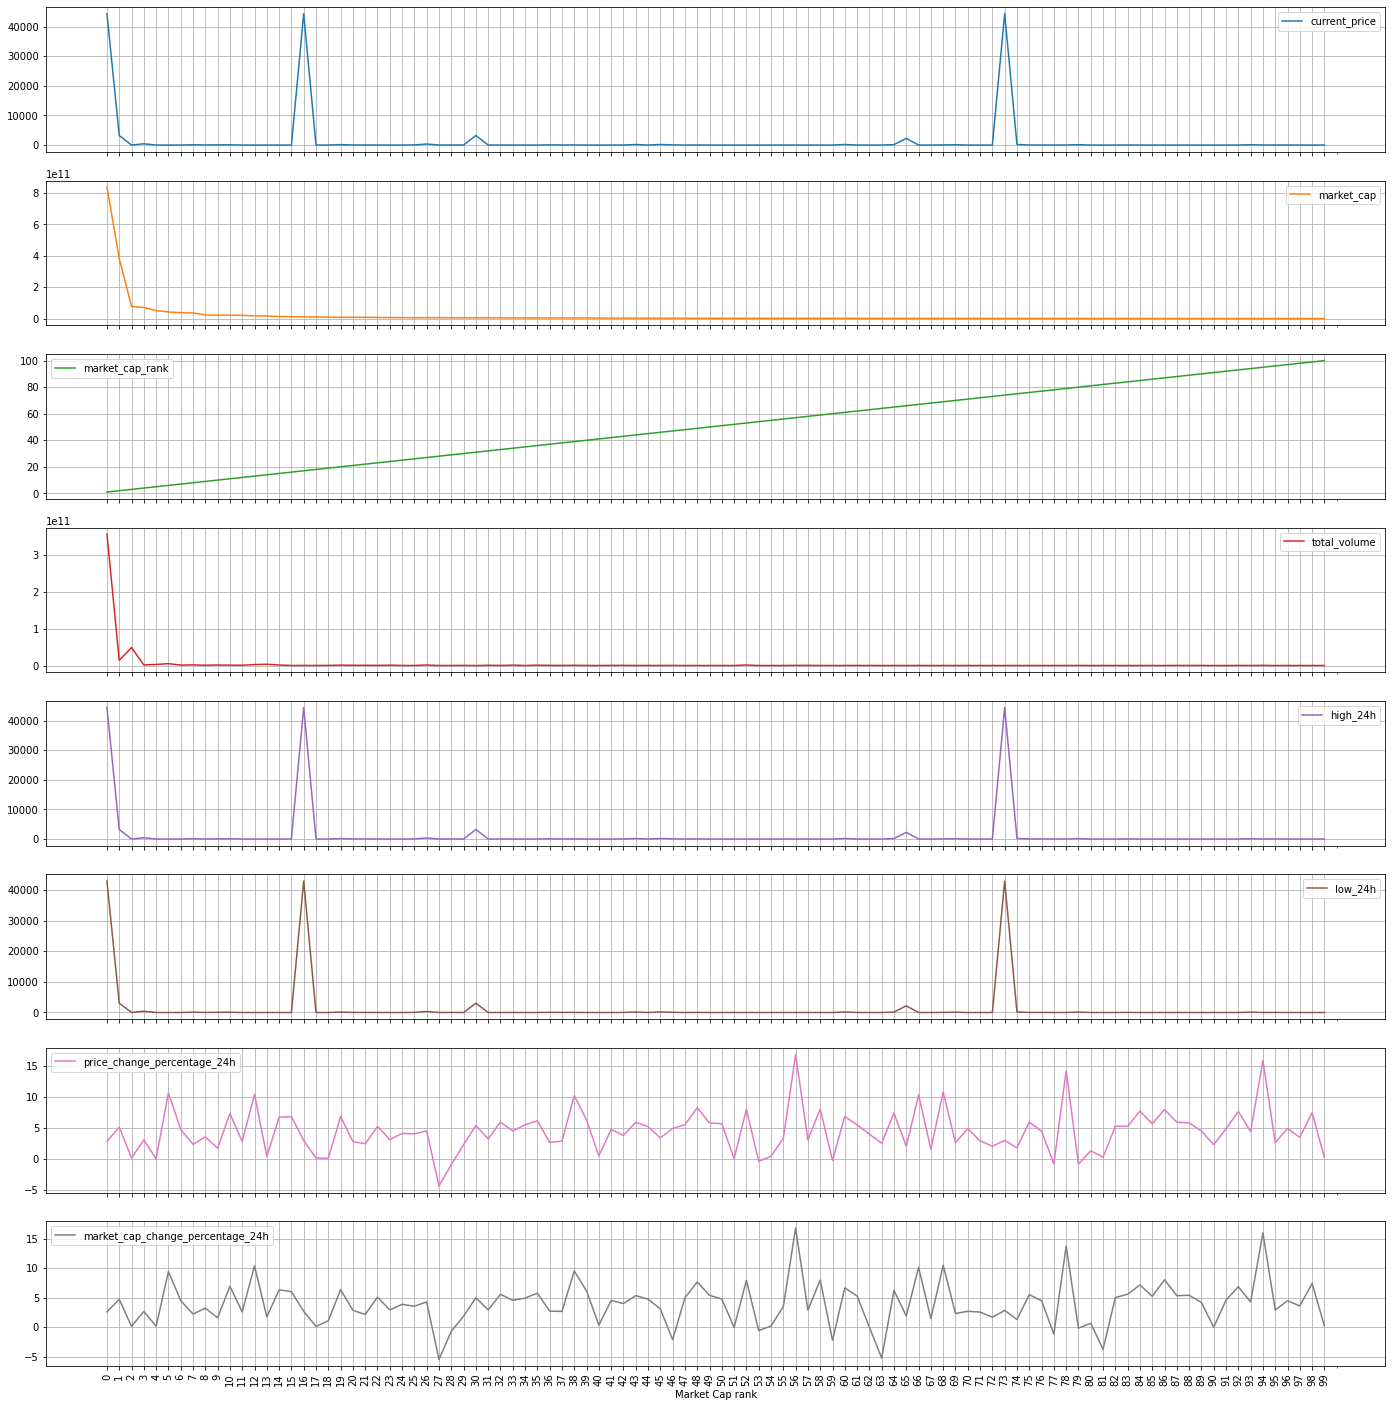

In [16]:
coin_data.plot(subplots=True,xticks=range(0,100,1),xlabel='Market Cap rank', rot=90,figsize=(24,25),grid=True);

### Insights:
- `current_price` graph shows that all except 3 coins are priced over \$10000. `high_24h` and `low_24h` also highlight the same.

- `market_cap` graph shows that market cap of first 3 coins are exceptionally higher than the rest.

- `total_volume` also show the first 3 coins have highest volumes, but it doesn't follow a trend similary to `current_price` or `market_cap`. 

- `price_change_percentage_24h` graph and `market_cap_change_percentage_24h` graph show similar trend in the past 24 hours.

### Let's answer some important questions that arise based on the insights we got.

#### - What is the price trend of the top 100 cryptocoins?

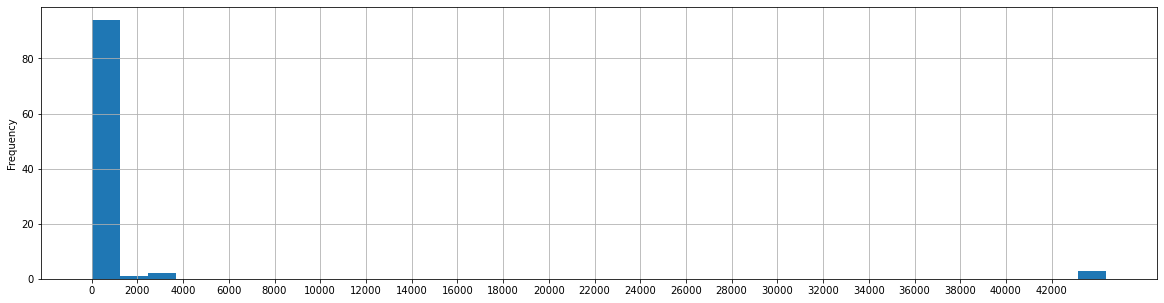

In [17]:
plt.figure(figsize=(20,5))
coin_data.current_price.plot(kind='hist',bins=36,xticks=range(0,43500,2000),grid=True);
# plt.xlabel=('Price of Coin');

The price of most coins fall `under $10,000` and few coins are priced `over $10,000`.

Let us plot a histogram of the `under $10,000` category and plot a line chart for the `over $10,000` category of coins.

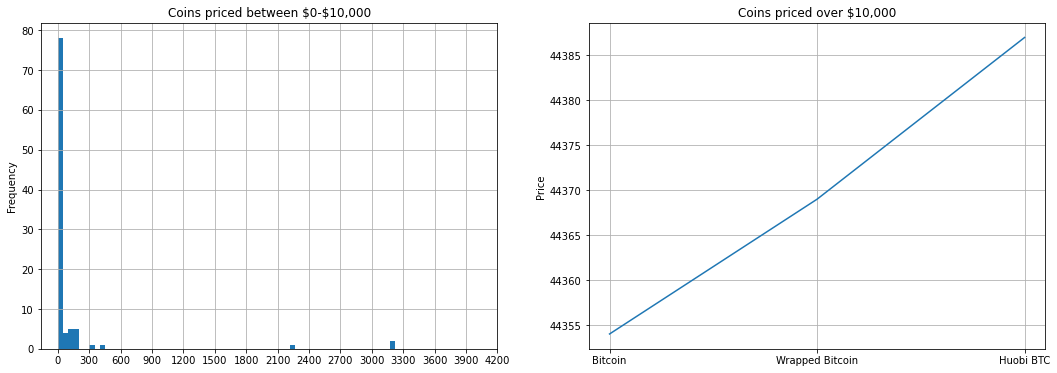

In [18]:
d=coin_data[coin_data.current_price>10000]
e=coin_data[coin_data.current_price<=10000]
plt.figure(figsize=(18,6))
plt.subplot(121)
e.current_price.plot(kind='hist',title='Coins priced between \$0-\$10,000',xlabel='Price', bins=64,xticks=range(0,4300,300),grid=True);
plt.subplot(122)
plt.plot(d.name,d.current_price)
plt.title('Coins priced over $10,000')
plt.ylabel('Price')
plt.grid();
# plt.yticks(range(40225,40900,75));

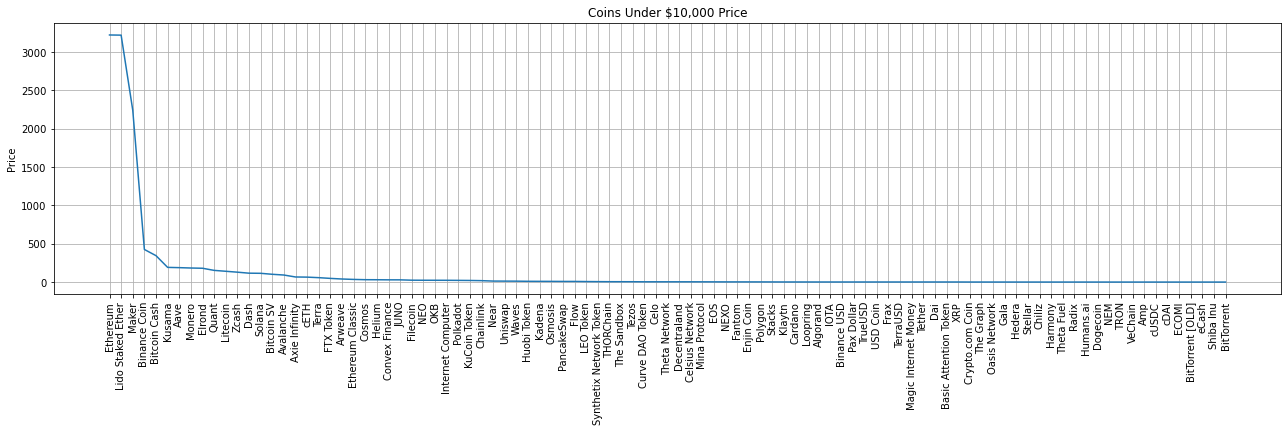

In [19]:
e=coin_data[coin_data.current_price<=10000].sort_values(by=['current_price'], ascending=False)
plt.figure(figsize=(22,5))
plt.plot(e.name,e.current_price)
plt.ylabel('Price')
plt.title('Coins Under $10,000 Price')
plt.xticks(rotation=90)
plt.grid();

#### - What are the Top 10 Coins with Highest Market Cap? What are the 10 Lowest Market Cap Coins?

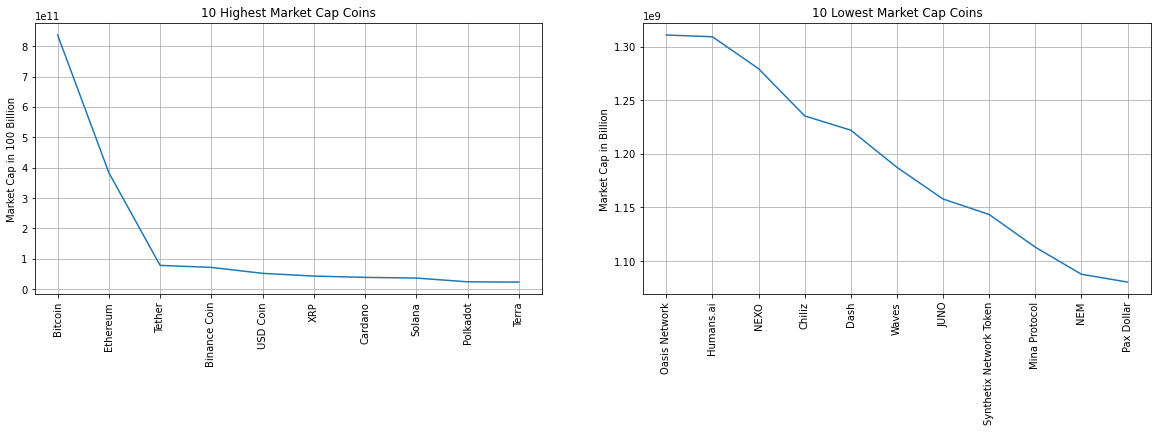

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(coin_data[:10].name,coin_data[:10].market_cap)
plt.ylabel('Market Cap in 100 Billion')
plt.title('10 Highest Market Cap Coins');
plt.xticks(rotation=90)
plt.grid();
plt.subplot(122)
plt.plot(coin_data[89:].name,coin_data[89:].market_cap)
plt.ylabel('Market Cap in Billion')
plt.title('10 Lowest Market Cap Coins')
plt.xticks(rotation=90)
plt.grid();

In [98]:
print(f'- There are two coins which have Market Cap over $100 Billion:  `{coin_data[coin_data.market_cap>100000000000].name[0]}` & `{coin_data[coin_data.market_cap>100000000000].name[1]}`.')
print(f'- The coin with lowest Market Cap in our dataset is `{coin_data.name[99]}`.')

- There are two coins which have Market Cap over $100 Billion:  `Bitcoin` & `Ethereum`.
- The coin with lowest Market Cap in our dataset is `Pax Dollar`.


#### - What are the trends of `'market_cap_change_percentage_24h'` & `'price_change_percentage_24h'` for Highest Market Cap and Lowest Market Cap Coins`?

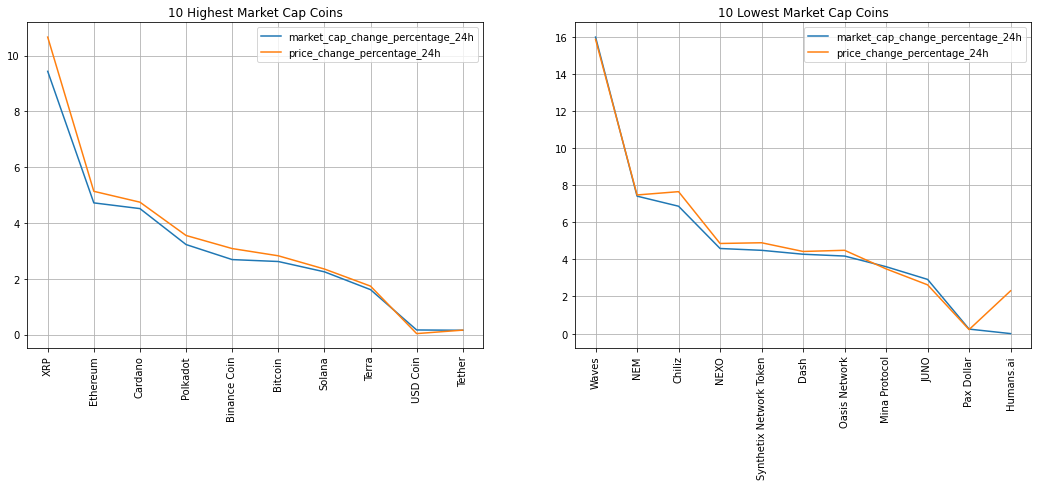

In [33]:
f=coin_data[:10].sort_values(by=['market_cap_change_percentage_24h'], ascending=False)
g=coin_data[89:].sort_values(by=['market_cap_change_percentage_24h'], ascending=False)
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(f.name, f.market_cap_change_percentage_24h, label='market_cap_change_percentage_24h')
plt.plot(f.name, f.price_change_percentage_24h, label='price_change_percentage_24h')
plt.title('10 Highest Market Cap Coins')
plt.xticks(rotation=90)
plt.legend()
plt.grid();
plt.subplot(122)
plt.plot(g.name, g.market_cap_change_percentage_24h, label='market_cap_change_percentage_24h')
plt.plot(g.name, g.price_change_percentage_24h, label='price_change_percentage_24h')
plt.title('10 Lowest Market Cap Coins')
plt.xticks(rotation=90)
plt.legend();
plt.grid();

#### - What percentage of coins had positive price change in last 24 hours? What percentage of coins had positive market cap change in last 24 hours?

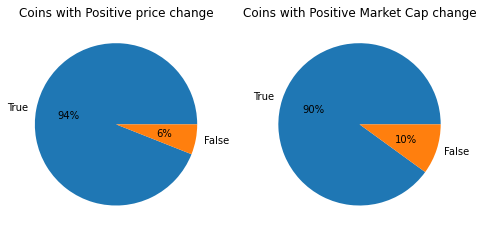

In [34]:
plt.figure(figsize=(8,4))
plt.subplot(121)
coin_data['positive_price_change']=coin_data.price_change_percentage_24h>=0
pc=coin_data.value_counts('positive_price_change')
plt.title('Coins with Positive price change')
plt.pie(pc,labels=['True','False'],autopct='%.0f%%');
plt.subplot(122)
coin_data['positive_market_cap_change']=coin_data.market_cap_change_percentage_24h>=0
mc=coin_data.value_counts('positive_market_cap_change')
plt.title('Coins with Positive Market Cap change')
plt.pie(mc,labels=['True','False'],autopct='%.0f%%');

#### - What are the Coins with Highest  and Lowest `'price_change_percentage_24h'`?

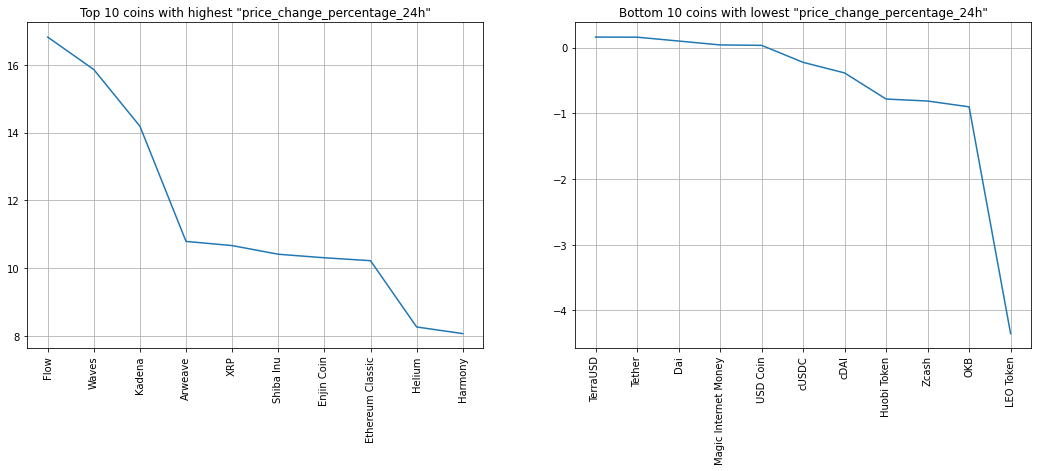

In [35]:
# per price change in order top 10, bottom 10
n=coin_data.nlargest(100,'price_change_percentage_24h')

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(n[:10].name, n[:10].price_change_percentage_24h)
plt.title('Top 10 coins with highest \"price_change_percentage_24h\"')
plt.xticks(rotation=90)
plt.grid();
plt.subplot(122)
plt.plot(n[89:].name, n[89:].price_change_percentage_24h)
plt.title('Bottom 10 coins with lowest \"price_change_percentage_24h\"')
plt.xticks(rotation=90);
plt.grid();

#### - What are the Coins with Highest  and Lowest `'market_cap_change_percentage_24h'`?

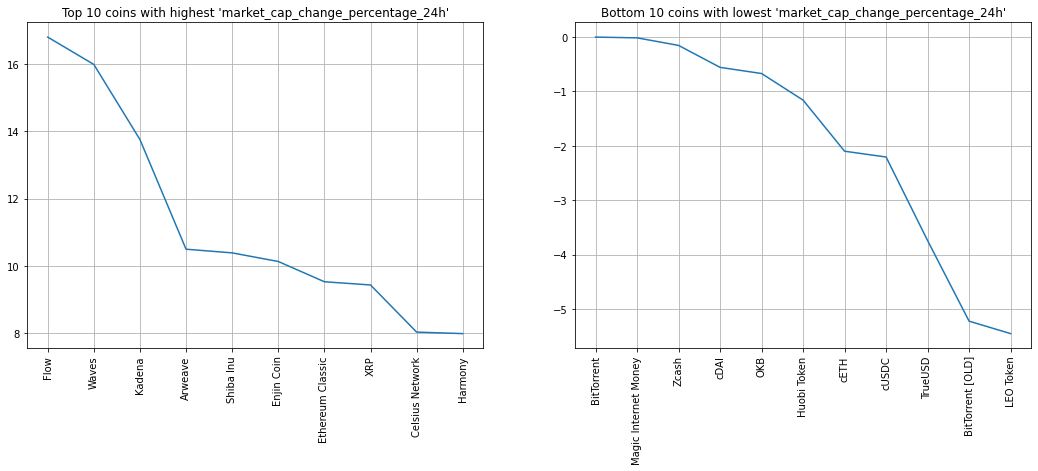

In [36]:
# percentage market change in order top 10 , bottom 10
m=coin_data.nlargest(100,'market_cap_change_percentage_24h')
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(m[:10].name, m[:10].market_cap_change_percentage_24h)
plt.title('Top 10 coins with highest \'market_cap_change_percentage_24h\'')
plt.xticks(rotation=90)
plt.grid();
plt.subplot(122)
plt.plot(m[89:].name, m[89:].market_cap_change_percentage_24h)
plt.title('Bottom 10 coins with lowest \'market_cap_change_percentage_24h\'')
plt.xticks(rotation=90);
plt.grid();

#### - What are trends in Total Volume,  Market Cap and Price change for `Coins priced over $10,000`?

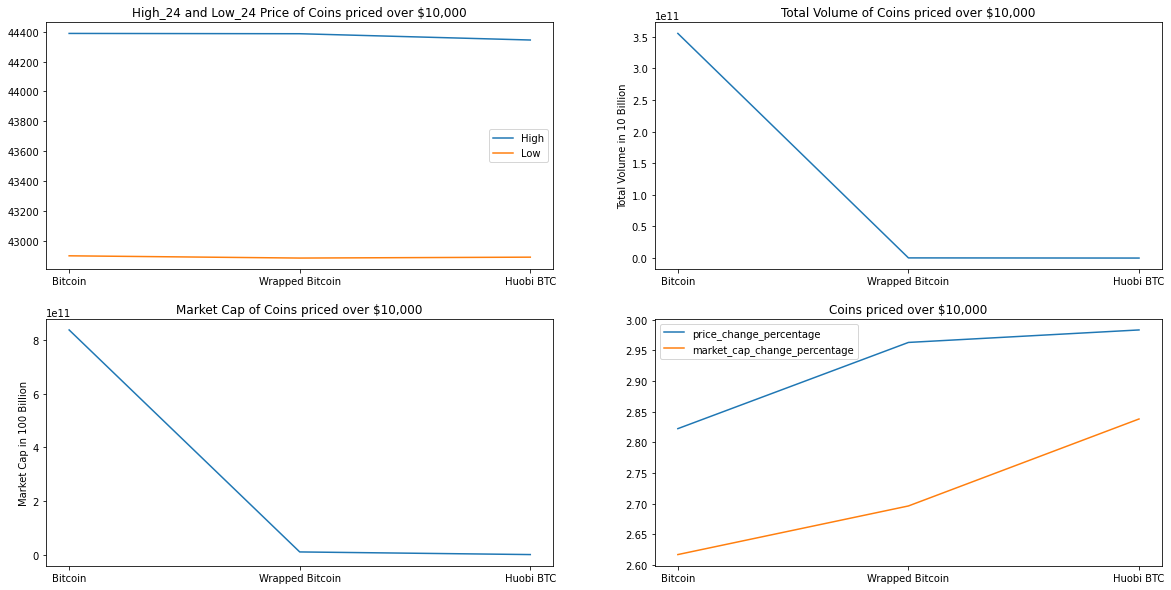

In [37]:
plt.figure(figsize=(20,10))
plt.subplot(222)
plt.plot(d.name,d.total_volume)
plt.title('Total Volume of Coins priced over $10,000')
plt.ylabel('Total Volume in 10 Billion');

plt.subplot(221)
plt.plot(d.name,d.high_24h, label='High')
plt.plot(d.name,d.low_24h, label='Low')
plt.title('High_24 and Low_24 Price of Coins priced over $10,000')
plt.legend();

plt.subplot(223)
plt.plot(d.name,d.market_cap)
plt.title('Market Cap of Coins priced over $10,000')
plt.ylabel('Market Cap in 100 Billion');

plt.subplot(224)
plt.plot(d.name,d.price_change_percentage_24h,label='price_change_percentage')
plt.plot(d.name,d.market_cap_change_percentage_24h, label='market_cap_change_percentage')
plt.title('Coins priced over $10,000')
plt.legend();

In [87]:
fd=d.sort_values(by='market_cap_change_percentage_24h',ascending=False).head(1).reset_index()
print('- `Bitcoin` has significantly Higher Market Cap than other coins with similar price due its significantly higher total volume.')

print(f'\n- `{fd.name[0]}` has highest `price_change_percentage_24h` and `market_cap_change_percentage_24h`.')

print('\n-  We can visualize this price change using a candlestick graph.')

- `Bitcoin` has significantly Higher Market Cap than other coins with similar price due its significantly higher total volume.

- `Huobi BTC` has highest `price_change_percentage_24h` and `market_cap_change_percentage_24h`.

-  We can visualize this price change using a candlestick graph.


In [89]:
candlegraph(fd.id[0] , 30)

#### - Plot scatterplot to visualize `market_cap_change_percentage_24h` and `price_change_percentage_24h` with respect to `total_volume`.

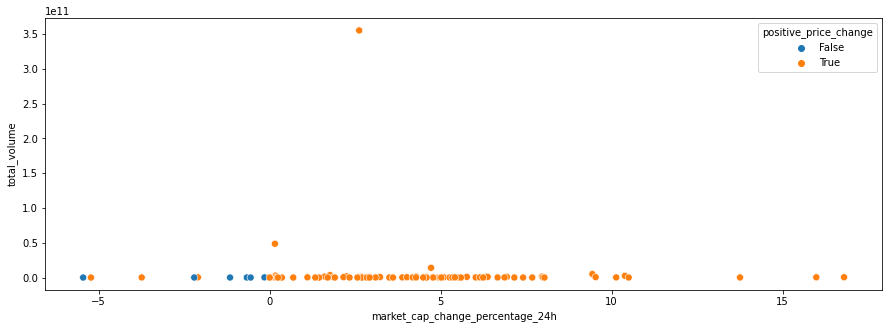

In [91]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=coin_data.market_cap_change_percentage_24h, # X-axis
                y=coin_data.total_volume,  # Y-axis
                hue=coin_data.positive_price_change,  # Dot color
                s=50);

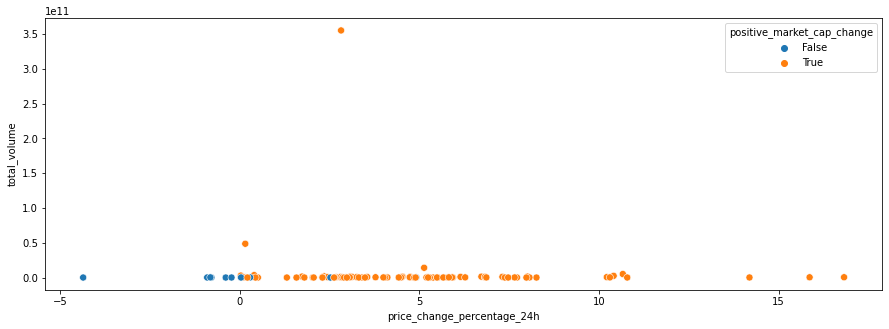

In [93]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=coin_data.price_change_percentage_24h, # X-axis
                y=coin_data.total_volume,  # Y-axis
                hue=coin_data.positive_market_cap_change,  # Dot color
                s=50);